<h1 style="text-align:center">State Farm Distracted Driver Detection and Claims Severity Analysis</h1>


# Introduction

Distracted driving is a significant and growing problem on our roads, causing a substantial number of accidents, injuries, and fatalities every year. Insurance companies, like State Farm, play a vital role in processing claims and mitigating the financial impact of these incidents. In order to address this issue, our project focuses on the following **problem statement** and **value addition**:

## Problem Statement

Analyze the State Farm Claims dataset to explore the various factors that contribute to the severity of claims made, and identify patterns and trends in the data that can help improve the claims process and detect potentially fraudulent claims.

## Value Add

1. Develop models to predict the severity of claims, leading to a more efficient claims assessment process.
2. Identify potentially fraudulent claims, minimizing financial losses for the insurance company.
3. Enhance the overall claims process by leveraging data-driven insights, leading to improved customer satisfaction.
4. Contribute to a safer driving environment by promoting awareness of the factors contributing to severe claims.

In this project, we will explore the State Farm Claims dataset, which consists of both tabular data and images of drivers in various states of distraction. We will preprocess the data, perform exploratory data analysis, and engineer relevant features that can be used in our models. We will then train and evaluate various machine learning models, such as logistic regression, decision trees, and deep learning models, to determine the most effective approach for predicting the severity of claims and identifying potentially fraudulent claims. Finally, we will present our findings, discuss the implications of our analysis, and propose recommendations for improving the claims process and combating fraudulent claims.


Let's take a closer look at the data we will be working with.

In [1]:
from IPython.display import Markdown, display

# Data dictionary for CSV data
csv_dict = """
| Column Name | Description |
| ----------- | ----------- |
| subject     | Unique identifier for the driver |
| img         | Filename of image corresponding to the driver |
| classname       | Class label corresponding to the driver's state of distraction |
"""

# Data dictionary for image data
img_dict = """
| Column Name | Description |
| ----------- | ----------- |
| filename    | Name of the image file |
| distracted | Indicator of whether the driver is distracted or not |
| features | Extracted features from the image data 
"""

display(Markdown("**CSV Data Dictionary:**"))
display(Markdown(csv_dict))

display(Markdown("**Image Data Dictionary:**"))
display(Markdown(img_dict))


**CSV Data Dictionary:**


| Column Name | Description |
| ----------- | ----------- |
| subject     | Unique identifier for the driver |
| img         | Filename of image corresponding to the driver |
| classname       | Class label corresponding to the driver's state of distraction |


**Image Data Dictionary:**


| Column Name | Description |
| ----------- | ----------- |
| filename    | Name of the image file |
| distracted | Indicator of whether the driver is distracted or not |
| features | Extracted features from the image data 


Our analysis is focused on identifying the factors that contribute to the severity of claims made. The dataset consists of tabular data with 3 columns: subject, classname, and severity. The subject column provides the driver ID, while the classname column provides information on the different states of driver distraction. The severity column contains information on the severity of the claim.

The data dictionary for the tabular data provides valuable information on the different columns and their types, allowing us to understand the data effectively. With this understanding, we can preprocess and engineer features from the data to train models for predicting the severity of claims and detecting fraudulent claims.

In addition to the tabular data, the dataset also includes images of drivers in different states of distraction. The images are categorized by the type of distraction and do not have width, height or channel columns. The data dictionary for the images dataset provides valuable information on the file format and naming convention of the images, which we can use to extract features for our analysis.

In [6]:
%cd ~/Downloads


C:\Users\User\Downloads


In [7]:
import pandas as pd
import zipfile
import os

# set the file path to the zipped archive
zip_path = "state-farm-distracted-driver-detection.zip"

# set the file path to the CSV file within the zipped archive
csv_path = "driver_imgs_list.csv"

# open the zipped archive
with zipfile.ZipFile(zip_path, "r") as zip_file:
    # read in the CSV file from the zipped archive into a pandas dataframe
    csv_df = pd.read_csv(zip_file.open(csv_path))

# print the number of rows and columns in the dataframe
print("Number of rows: ", len(csv_df))
print("Number of columns: ", len(csv_df.columns))


Number of rows:  22424
Number of columns:  3


In [ ]:
After importing our data, let's take a closer look at it and do some cleaning as necessary.

In [8]:
# display the first 5 rows of the dataframe
csv_df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


The CSV file contains the classnames which are just characters, and we are not able to infer what they mean. However, State Farm, the provider of the dataset, has provided descriptions for each of the 10 classes that include different activities a driver may engage in while on the road. By using this information, we can create a new column in our dataset that identifies the activity for each image.

We can achieve this by using a mapping function that maps each classname to its corresponding activity description. Once we have created the new column, we can use various statistical techniques to explore the relationship between this column and other columns in our dataset, such as the subject column.

In [9]:
# Define a dictionary to map class labels to activity descriptions
activity_map = {
    'c0': 'safe driving',
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger'
}

# Create a new column called "activity" that maps the class labels to activity descriptions
csv_df['activity'] = csv_df['classname'].map(activity_map)

In [13]:
csv_df.head()

,subject,classname,img,activity
0,p002,c0,img_44733.jpg,safe driving
1,p002,c0,img_72999.jpg,safe driving
2,p002,c0,img_25094.jpg,safe driving
3,p002,c0,img_69092.jpg,safe driving
4,p002,c0,img_92629.jpg,safe driving


In [10]:
print(csv_df.dtypes)

subject      object
classname    object
img          object
activity     object
dtype: object


The output shows that all the columns in the dataframe are of the object data type, which is pandas' generic way of representing string data. In this case, it indicates that all the data in the dataframe is text-based, rather than numerical or boolean.

In [11]:
csv_df.isna().sum()

subject      0
classname    0
img          0
activity     0
dtype: int64

This output indicates that there are no missing values in the csv_df dataframe

The good news is that upon checking, the dataset does not contain any duplicates. However, in case duplicates were found, we would proceed to remove them in order to reduce biased or misleading results.

In [12]:
duplicates = csv_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


## Exploratory Data Analysis (EDA)
Now that we've done some basic preprocessing of the data, let's move on to exploratory data analysis (EDA) to gain a deeper understanding of the data.

### Visualize the distribution of the class labels
First, let's take a look at the distribution of the class labels to see if there are any patterns or imbalances in the data.

In [14]:
csv_df["classname"].value_counts()

c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64

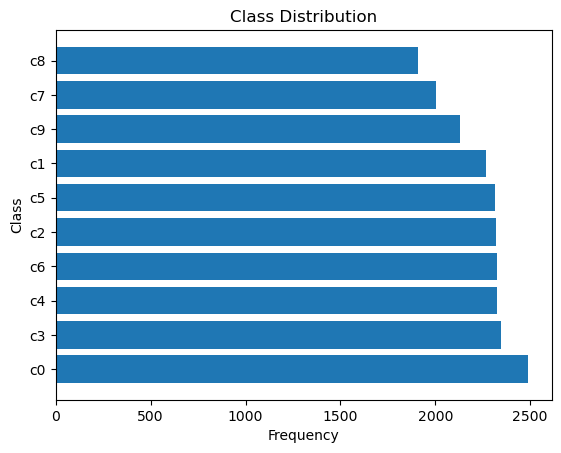

In [15]:
import matplotlib.pyplot as plt

# get the value counts for each class
class_counts = csv_df["classname"].value_counts()

# create a horizontal bar plot of the class distribution
plt.barh(class_counts.index, class_counts.values)

# set the title and labels for the plot
plt.title("Class Distribution")
plt.xlabel("Frequency")
plt.ylabel("Class")

# display the plot
plt.show()

From the values count and the graph, we can see that the dataset is relatively balanced, with the number of images in each class ranging from 1911 to 2489. This is a positive indication that the dataset will not be biased towards any one class during model training. Overall, this initial exploration of the dataset suggests that it is a suitable starting point for our analysis.

In [41]:
import numpy as np

# calculate the percentage of images in each class
class_percentages = csv_df["classname"].value_counts(normalize=True) * 100

# print the percentage of images in each class
print("Class percentages:")
print(class_percentages)

# calculate the standard deviation of the class percentages
std_dev = np.std(class_percentages)

# print the standard deviation of the class percentages
print("Standard deviation of class percentages:", std_dev)

# check if the standard deviation is greater than a certain threshold
if std_dev > 5:
    print("Warning: Class imbalance detected.")
else:
    print("No class imbalance detected.")


Class percentages:
c0    11.099715
c3    10.462005
c4    10.372815
c6    10.368355
c2    10.332679
c5    10.310382
c1    10.109704
c9     9.494292
c7     8.927934
c8     8.522119
Name: classname, dtype: float64
Standard deviation of class percentages: 0.7420068664455836
No class imbalance detected.


The results indicate that there is no significant class imbalance in the data as the percentage of samples in each class is relatively equal, with the highest and lowest percentages being 11.1% and 8.5% respectively. This is confirmed by the standard deviation of the class percentages, which is relatively low at 0.742, further indicating that there is no significant imbalance.

In [42]:
csv_df.describe()

,subject,classname,img
count,22424,22424,22424
unique,26,10,22424
top,p021,c0,img_44733.jpg
freq,1237,2489,1


From the results, we can see that the subject column has 26 unique values, the classname column has 10 unique values, and the img column has 22,424 unique values. The most common value for subject is p021, the most common value for classname is c0, and each value in the img column is unique.

### Check for Subject imbalance
We already know that the class distributim is relatively balance. Now, we'll check for subject imbalance to ensure that each class has roughly the same number of samples. If there is a significant imbalance, we may need to consider using techniques like oversampling or undersampling to address this issue.

To explore this further let's use some visualization to help us.

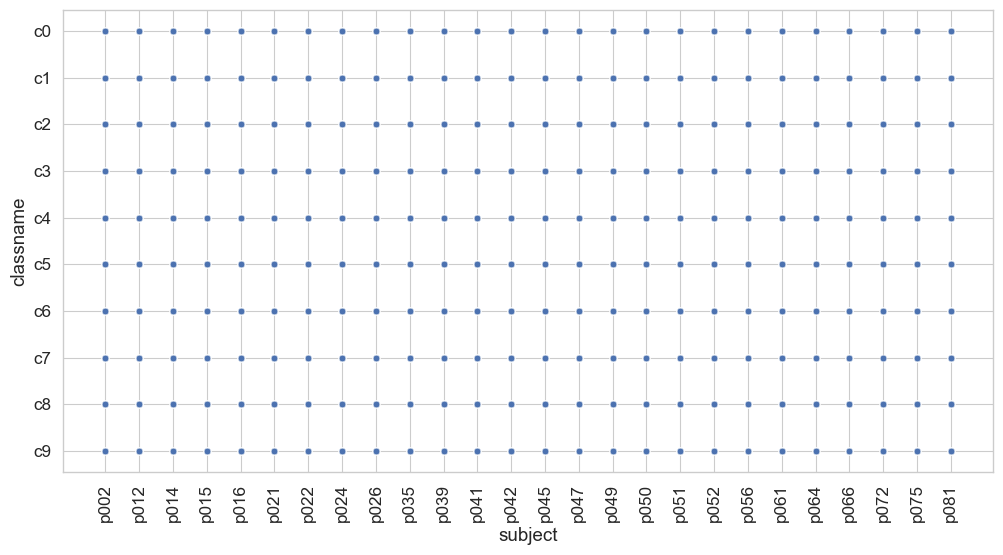

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(data=csv_df, x='subject', y='classname')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [61]:
csv_df['subject'].value_counts()

p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p081     823
p012     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: subject, dtype: int64

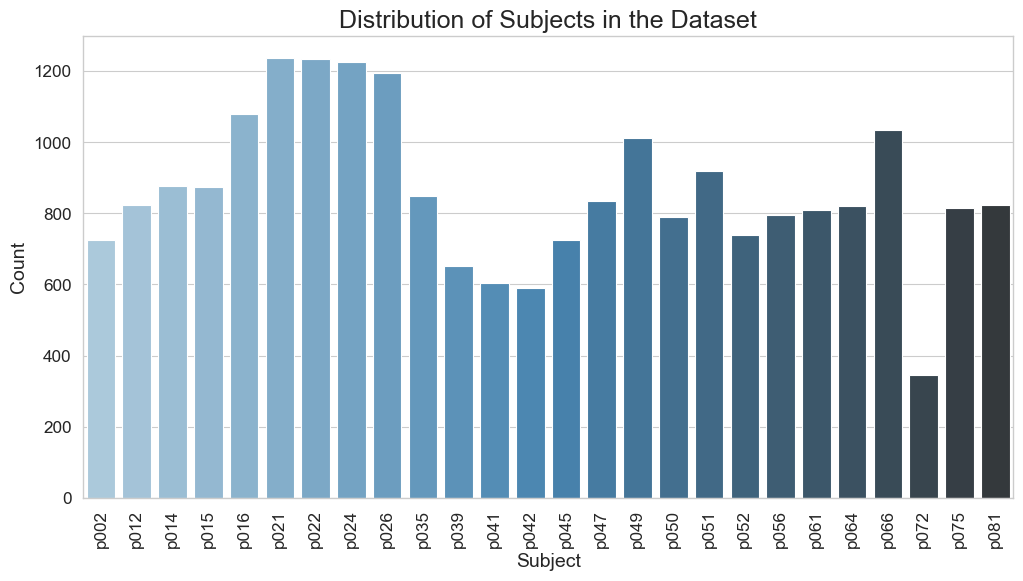

In [60]:
# Set the style and context of the plot
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.4)

# Create the countplot
plt.figure(figsize=(12,6))
ax = sns.countplot(x='subject', data=csv_df, palette='Blues_d')

# Set the title and axis labels
ax.set_title('Distribution of Subjects in the Dataset', fontsize=18)
ax.set_xlabel('Subject', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

We can see that the distribution of subjects is not completely balanced, with some subjects having more occurrences than others. However, the difference in the number of occurrences is not significant, with the most common subject appearing only 1237 times out of a total of 22424 rows. Therefore, we can consider the subject distribution to be relatively balanced. 

The scatter plot of subject vs. classname shows a straight line plot for each class, indicating that there is no correlation between the two variables. The count plot of subjects shows that subject p021 is the most frequent subject, appearing 1237 times, while subject p072 is the least frequent subject, appearing only 346 times. Overall, the subject distribution is relatively balanced and should not significantly affect our modeling.

This is good, but let's further study these two variables. One possible statistical analysis that can be performed on it is to compare the distribution of the different classess across the subjects. This also can help identify any potential relationships or patterns between the activities and the subjects, which can be useful in predicting future claims and identifying fraudulent claims.

To do this, we can use a contingency table and perform a chi-square test of independence. The contingency table will have the subjects as the rows and the different classes as the columns. We can then calculate the expected values for each cell based on the row and column totals, and compare these with the observed values using the chi-square test.

To perform a chi-square test of independence, we first need to create a contingency table that shows the relationship between the subjects and the different activities/classes. We can use the crosstab function from the pandas library to create this table.

In [22]:
import pandas as pd

# Create the contingency table
cont_table = pd.crosstab(index=csv_df['subject'], columns=csv_df['classname'])

# Print the contingency table
print(cont_table)

classname   c0   c1   c2   c3   c4   c5   c6   c7   c8   c9
subject                                                    
p002        76   74   86   79   84   76   83   72   44   51
p012        84   95   91   89   97   96   75   72   62   62
p014       100  103  100  100  103  102  101   77   38   52
p015        79   85   88   94  101  101   99   81   86   61
p016       111  102  101  128  104  104  108  101   99  120
p021       135  131  127  128  132  130  126   98   99  131
p022       129  129  128  129  130  130  131   98   98  131
p024       130  129  128  130  129  131  129  101   99  120
p026       130  129  130  131  126  130  128   97   97   98
p035        94   81   88   89   89   89   94   87   56   81
p039        65   63   70   65   62   64   63   64   70   65
p041        60   64   60   60   60   61   61   61   59   59
p042        59   59   60   59   58   59   59   59   59   60
p045        75   75   76   75   75   76   71   67   66   68
p047        80   91   81   86   82   87 

The null hypothesis is that there is no significant relationship between the subject and the type of activity being performed. Our hypothesisis that there's a significant association between the two variables, indicating that the distribution of activity types is different across subjects.

In [23]:
from scipy.stats import chi2_contingency

# Perform the chi-square test of independence
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the test statistic and p-value
print('Test Statistic:', chi2)
print('p-value:', pval)

Test Statistic: 420.1983751587359
p-value: 5.738911934189186e-14


The low p-value obtained from the chi-square test, which supports our position, indicates that there is a significant relationship between the subject and the type of activity being performed. This suggests that there may be certain subjects who are more likely to engage in certain types of distracting activities while driving, which could be a valuable insight for State Farm in improving the claims process and detecting potentially fraudulent claims. 

However, it's important to note that this relationship is specific to the dataset used in this analysis, and further research may be needed to confirm these findings. Additionally, while there may be a significant association between the variables, it does not necessarily mean that there is a strong or causal relationship between them.